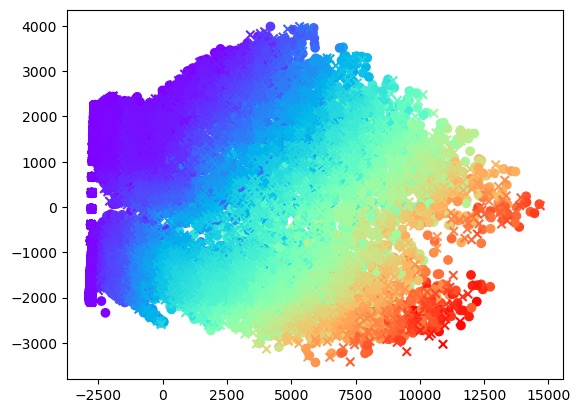

/kaggle/working/predicted_values.csv

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# load the data
train_df = pd.read_csv("/kaggle/input/dsai-uol-enappsys/train.csv")
X = train_df.drop(columns=['Id', 'y'])
y = train_df['y']

# perform PCA on the dataset to reduce its dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# train a Gradient Boosting regressor
gb = GradientBoostingRegressor()
gb.fit(X_pca, y)

# save the model to file
joblib.dump(gb, 'model.joblib')

# load the model from file
gb = joblib.load('model.joblib')

# predict y values for test data
test_df = pd.read_csv("/kaggle/input/dsai-uol-enappsys/test.csv")
test_ids = test_df['Id']
test_data = test_df.drop(columns=['Id'])
test_pca = pca.transform(test_data)
y_pred = gb.predict(test_pca)

# create a dataframe with predicted y values
pred_df = pd.DataFrame({'Id': test_ids, 'y': y_pred})

# save the dataframe to a csv file
pred_df.to_csv('predicted_values.csv', index=False)

# visualize the predicted data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=y_pred, cmap='rainbow', marker='x')
plt.show()
from IPython.display import FileLink
FileLink(r'predicted_values.csv')

